Here we directly calculate Mercury's precession over 100,000 years   

In [9]:
import rebound 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


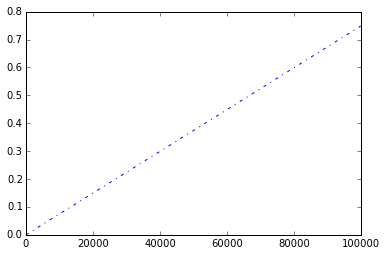

In [11]:
rebound.reset(); 
rebound.G=4*np.pi*np.pi;   
rebound.integrator = 'whfast';
rebound.add(m=1) 
rebound.add(m=1.66e-07, a=0.387, e=0.206) 
rebound.add(m=0.000955, a=5.20, e=0.0484) 
rebound.move_to_com()
Noutputs = 1000;
times = np.linspace(0,100000,Noutputs) 
periangle_mercury = np.zeros(Noutputs) #This will be Mercury's angle of periapse
for i,t in enumerate(times):
    rebound.integrate(t)      
    orbits = rebound.calculate_orbits() # Calculate orbital elements
    periangle_mercury[i] = orbits[0].omega+orbits[0].Omega  #See below
plt.plot(times,periangle_mercury,'-.');

Note: omega and Omega are two orbital angles that REBOUND computes when it calculates orbital elements. These provide the orientation of an ellipse in 3 dimensions.  It turns out that the periapse angle is just the sum of omega+Omega. Note also that orbits[0] gives Mercury's orbit. (The index 0 is a little confusing, since rebound.particles[1].x gives Mercury's position.  The logic is that the 0 in orbits[0] refers to the Sun-Mercury orbit)
